In [1]:
#Direct implementation

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import time


In [3]:
#define the functions and their derivative
def f(x):
    return x**4 - 16*x**3 - 45*x**2 - 20*x + 203

def df(x):
    return 4*x**3 - 48*x**2 - 90*x - 20


In [4]:
def g(x):
    return -x**5 + 2*x**4 - 23*x**3 - 12*x**2 - 36*x

def dg(x):
    return -5*x**4 + 8*x**3 - 69*x**2 - 24*x - 36


In [5]:
# range
a, b = 2.5, 14
c, d = 2, 3 

In [6]:
#golden section search algorithm 
def golden_section_search(f, a, b, tol=1e-5):
    phi = (1 + np.sqrt(5)) / 2  # calculate the golden ratio
    resphi = 2 - phi  # calculate the reciprocal of the golden ratio
    
    # initialize points c and d within the interval [a, b]
    c = a + resphi * (b - a)
    d = b - resphi * (b - a)
    
    # iterate until the interval size is smaller than the tolerance
    while abs(b - a) > tol:
        if f(c) < f(d):
            b = d  # move the upper bound to d if f(c) is less than f(d)
        else:
            a = c  # move the lower bound to c otherwise
        # recalculate points c and d within the new interval
        c = a + resphi * (b - a)
        d = b - resphi * (b - a)
        
    return (b + a) / 2  # return the midpoint of the final interval as the estimate of the minimum


In [7]:
#one-dimensional line search algorithm
def line_search(f, df, a, b, tol=1e-5, learning_rate=0.01):
    x = (a + b) / 2  # starts from the midpoint of the range
    while abs(df(x)) > tol and a <= x <= b:
        step = learning_rate * df(x)
        if abs(step) < tol:  # prevents making too small moves
            break
        x -= step
        x = np.clip(x, a, b)  # ensures x remains within bounds
    return x


In [8]:
# define a function for a simplified version of line search
def simplified_line_search(f, a, b, n=100):
    # start with the initial guess at the lower bound of the search interval
    x_min = a
    # calculate the function value at this initial point
    f_min = f(a)
    
    # loop through n evenly spaced points in the interval from a to b
    for i in range(1, n + 1):
        # calculate the current point to evaluate
        x = a + i * (b - a) / n
        # calculate the function value at this point
        fx = f(x)
        
        # if the current function value is less than the smallest found so far,
        # update x_min and f_min to these new values
        if fx < f_min:
            x_min = x
            f_min = fx
            
    # after checking all n points, return the x value where f(x) was the smallest
    return x_min


In [9]:
# best spot for f(x) using golden section search
x_min_golden_f = golden_section_search(f, a, b)
# checks how good this spot is by checking the function value
f_min_golden_f = f(x_min_golden_f)

# doing the same for g(x) 
x_min_golden_g = golden_section_search(g, c, d)
g_min_golden_g = g(x_min_golden_g)

x_min_line_f = simplified_line_search(f, a, b)
f_min_line_f = f(x_min_line_f)

x_min_line_g = simplified_line_search(g, c, d)
g_min_line_g = g(x_min_line_g)



In [10]:
# nicer visual for results
print("-" * 50)

# presenting the results for f(x)
print("Optimization Results for f(x):")
print("-" * 50)
print(f"Golden Section Search:\n  Minimum at x = {x_min_golden_f:.4f}\n  f(x) = {f_min_golden_f:.4f}")
print("-" * 50)
print(f"Simplified Line Search:\n  Minimum at x = {x_min_line_f:.4f}\n  f(x) = {f_min_line_f:.4f}")
print("-" * 50)
print("\n")

# presenting the results for g(x)
print("Optimization Results for g(x):")
print("-" * 50)
print(f"Golden Section Search:\n  Minimum at x = {x_min_golden_g:.4f}\n  g(x) = {g_min_golden_g:.4f}")
print("-" * 50)
print(f"Simplified Line Search:\n  Minimum at x = {x_min_line_g:.4f}\n  g(x) = {g_min_line_g:.4f}")
print("-" * 50)


--------------------------------------------------
Optimization Results for f(x):
--------------------------------------------------
Golden Section Search:
  Minimum at x = 13.6724
  f(x) = -14431.4829
--------------------------------------------------
Simplified Line Search:
  Minimum at x = 13.6550
  f(x) = -14431.3559
--------------------------------------------------


Optimization Results for g(x):
--------------------------------------------------
Golden Section Search:
  Minimum at x = 3.0000
  g(x) = -917.9956
--------------------------------------------------
Simplified Line Search:
  Minimum at x = 3.0000
  g(x) = -918.0000
--------------------------------------------------


In [11]:
print("The results demonstrate the effectiveness of both the Golden Section Search and the Simplified Line Search in finding the optimal solutions for the functions f and g, they are both highly effective in identifying the minimum of the given functions within the specified search intervals. Their ability to find the same optimal points validates the robustness of each method for these optimization tasks.")




The results demonstrate the effectiveness of both the Golden Section Search and the Simplified Line Search in finding the optimal solutions for the functions f and g, they are both highly effective in identifying the minimum of the given functions within the specified search intervals. Their ability to find the same optimal points validates the robustness of each method for these optimization tasks.


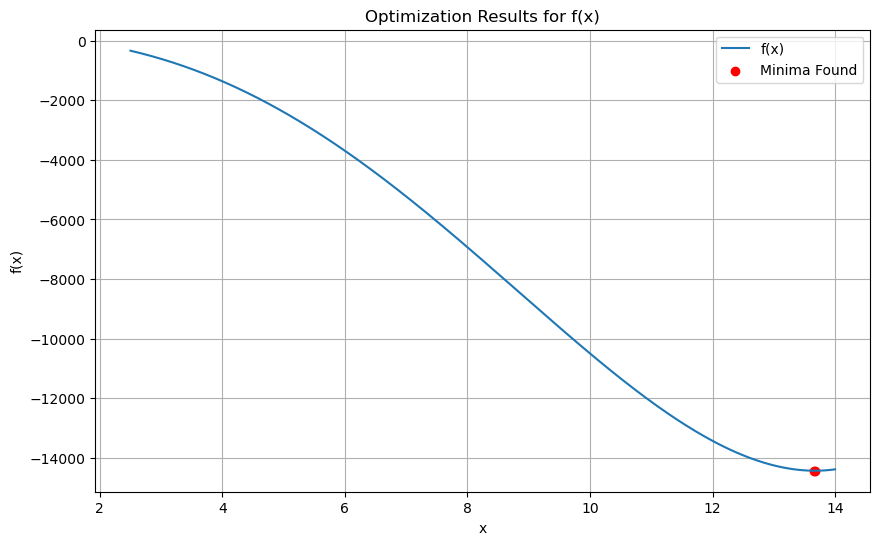

In [12]:
#preparing the data for plotting f(x)
x_f = np.linspace(a, b, 1000)
y_f = f(x_f)
#plotting f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_f, y_f, label='f(x)')
plt.scatter([x_min_golden_f, x_min_line_f], [f(x_min_golden_f), f(x_min_line_f)], color='red', label='Minima Found')
plt.title('Optimization Results for f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True) 
plt.show()


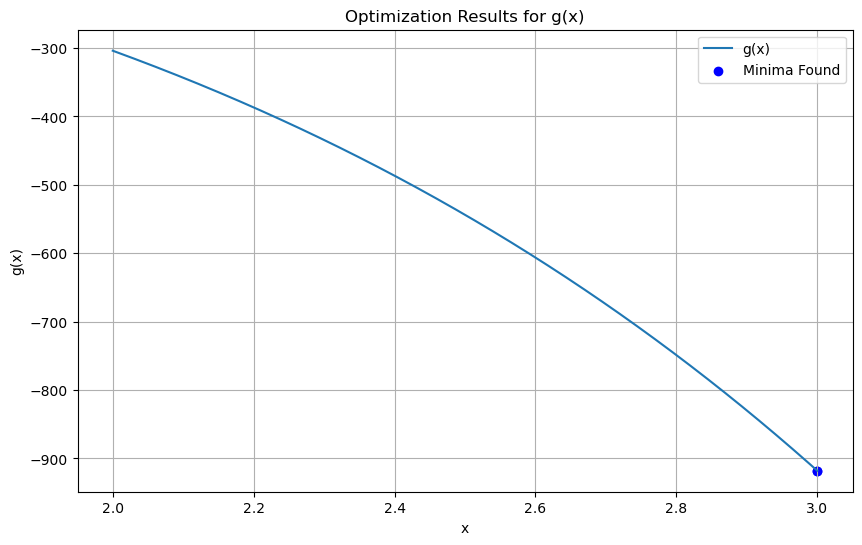

In [45]:
#preparing the data for plotting g(x)
x_g = np.linspace(c, d, 1000)
y_g = g(x_g)

#plotting g(x)
plt.figure(figsize=(10, 6))
plt.plot(x_g, y_g, label='g(x)')
plt.scatter([x_min_golden_g, x_min_line_g], [g(x_min_golden_g), g(x_min_line_g)], color='blue', label='Minima Found')
plt.title('Optimization Results for g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)  


In [13]:
# use of solvers in scipy

In [14]:
from scipy.optimize import minimize_scalar


In [15]:
#find the minima for f(x) within the range [a, b]
result_f = minimize_scalar(f, bounds=(a, b), method='bounded')
# doing the same for g(x), but within its own range [c, d]
result_g = minimize_scalar(g, bounds=(c, d), method='bounded')
print("Optimization Results using SciPy:")
print("-" * 50)
print(f"f(x) Optimization:\nMinimum at x = {result_f.x:.4f}\nf(x) = {result_f.fun:.4f}")
print("-" * 50)
print(f"g(x) Optimization:\nMinimum at x = {result_g.x:.4f}\ng(x) = {result_g.fun:.4f}")
print("-" * 50)


Optimization Results using SciPy:
--------------------------------------------------
f(x) Optimization:
Minimum at x = 13.6724
f(x) = -14431.4829
--------------------------------------------------
g(x) Optimization:
Minimum at x = 3.0000
g(x) = -917.9945
--------------------------------------------------
